# Analyse de l'évolution de la proportion d'achat

Dans ce notebook, l'objectif est d'avancer sur la question de la dépense totale du budget avant la fin de la journée. Une première idée est d'analyser l'évolution des proportions de br achetées chaque jour voir si un schéma commun se dégage. On s'attend à une augmentation forte des proportions d'achat en fin de journée, et c'est avéré on pourrait alors dans un premier temps mettre des règles "fixes" pour accélérer l'achat des bid requests quand la proportion augmente. 

In [1]:
import pandas as pd

In [38]:
df = pd.read_csv('16-06-2020_1month.csv', index_col="timestamp_string", parse_dates=True)

In [39]:
df.index.names = ['Date']

In [40]:
df = df[['identifiant','achat']]

In [41]:
df.head()

,identifiant,achat
Date,,
2020-06-16 06:00:01,1,1
2020-06-16 06:00:02,2,0
2020-06-16 06:00:03,3,0
2020-06-16 06:00:03,4,0
2020-06-16 06:00:03,5,0


In [42]:
df["c"] = 1 + df.groupby(df.index.day).cumcount()

In [43]:
df["cum"] = df['achat'].groupby(df.index.day).cumsum()

In [44]:
df["prop"] = df['cum']*100/df['c']

In [19]:
df.index

DatetimeIndex(['2020-06-16 06:00:01', '2020-06-16 06:00:02',
               '2020-06-16 06:00:03', '2020-06-16 06:00:03',
               '2020-06-16 06:00:03', '2020-06-16 06:00:04',
               '2020-06-16 06:00:05', '2020-06-16 06:00:06',
               '2020-06-16 06:00:09', '2020-06-16 06:00:12',
               ...
               '2020-07-15 19:59:04', '2020-07-15 19:59:08',
               '2020-07-15 19:59:17', '2020-07-15 19:59:22',
               '2020-07-15 19:59:27', '2020-07-15 19:59:34',
               '2020-07-15 19:59:39', '2020-07-15 19:59:45',
               '2020-07-15 19:59:50', '2020-07-15 19:59:56'],
              dtype='datetime64[ns]', name='Date', length=112143, freq=None)

In [45]:
df.head()

,identifiant,achat,c,cum,prop
Date,,,,,
2020-06-16 06:00:01,1,1,1,1,100.000000
2020-06-16 06:00:02,2,0,2,1,50.000000
2020-06-16 06:00:03,3,0,3,1,33.333333
2020-06-16 06:00:03,4,0,4,1,25.000000
2020-06-16 06:00:03,5,0,5,1,20.000000


Maintenant que nous avons la proportion d'achat par bid request, qui évolue donc au fil de la journée pour chaque jour, nous pouvons reformatter la base afin d'avoir une courbe par jour et tracer donc toutes les évolutions. 

In [46]:
pivoted = df.pivot_table('prop', index = df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20
06:00:01,100.000000,75.000000,100.0,100.000000,100.0
06:00:02,50.000000,33.333333,50.0,NaN,NaN
06:00:03,26.111111,25.000000,NaN,50.000000,NaN
06:00:04,16.666667,NaN,NaN,NaN,NaN
06:00:05,14.285714,16.984127,NaN,33.333333,NaN


Pour que l'évolution soit plus visuelle, nous allons prendre la moyenne par heure des proportions d'achat. 

In [31]:
pivoted.index

Int64Index([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
            ...
            19, 19, 19, 19, 19, 19, 19, 19, 19, 19],
           dtype='int64', length=42444)

In [47]:
pivoted.index = pd.to_datetime(pivoted.index, format='%H:%M:%S').hour

In [48]:
means = pivoted.groupby(pivoted.index).mean()

In [49]:
means.head()

,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,...,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15
6,19.495413,18.931032,13.605112,22.928697,11.687809,8.607097,34.678886,42.976229,27.335504,47.236076,...,28.851201,12.636988,10.573695,23.524403,8.693153,7.034060,9.280169,13.563755,21.693145,17.080012
7,16.925237,21.271021,20.405448,36.212968,15.257755,9.539686,33.862659,29.508940,20.629087,41.665202,...,34.114861,17.117399,14.443811,30.221116,22.336578,6.765651,18.120487,19.446760,10.729708,21.751428
8,22.046881,23.669680,18.119033,32.731770,17.639354,11.288545,22.581065,23.631250,15.305951,22.292097,...,27.749409,17.705896,17.857128,28.132455,27.399056,10.658352,17.659171,16.302154,10.592295,26.113267
9,24.660002,22.973039,17.545529,25.974156,20.474205,13.145678,26.900397,26.105931,15.190155,23.710784,...,28.157558,22.160415,21.034876,27.052850,29.090711,11.007558,18.360214,20.111294,12.478452,29.537540
10,23.804046,22.807461,19.572372,25.541989,21.197994,14.287690,27.086351,26.541080,14.592487,27.592605,...,26.731545,22.898599,23.486757,25.922151,28.455754,13.338607,20.836919,22.124116,13.934498,24.476255


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

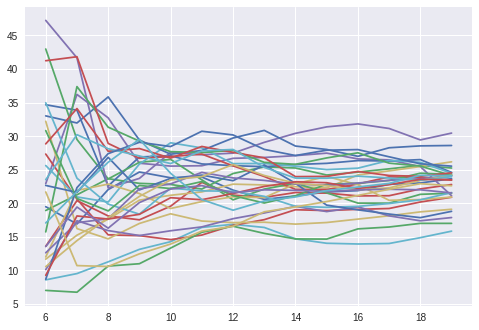

In [51]:
means.plot(legend=False)

On ne voit pas une augmentation de la proportion d'achat en fin de journée qui soit vraiment significative.

L'idée pour dégager peut être quelque chose de plus visuel serait de changer le calcul de la proportion d'achat, et plutôt que de prendre la proportion sur toute la journée, prendre la proportion à la fin de chaque heure par heure.

In [115]:
df = pd.read_csv('16-06-2020_1month.csv', index_col="timestamp_string", parse_dates=True)
df.index.names = ['Date']
df = df[['identifiant','achat']]
df.head()

,identifiant,achat
Date,,
2020-06-16 06:00:01,1,1
2020-06-16 06:00:02,2,0
2020-06-16 06:00:03,3,0
2020-06-16 06:00:03,4,0
2020-06-16 06:00:03,5,0


In [116]:
df['S'] = df['achat'].groupby([df.index.day, df.index.hour]).cumsum()

In [118]:
df["c"] = 1 + df.groupby([df.index.day, df.index.hour]).cumcount()

In [119]:
df["prop"] = df['S']*100/df['c']

In [125]:
new_df = df.groupby([df.index.day, df.index.hour]).tail(1)

In [126]:
new_df.head()

,identifiant,achat,S,c,prop
Date,,,,,
2020-06-16 06:56:37,402,0,58,402,14.427861
2020-06-16 07:50:32,573,1,51,171,29.824561
2020-06-16 08:59:59,751,1,71,178,39.887640
2020-06-16 09:59:54,931,0,52,180,28.888889
2020-06-16 10:53:43,1234,0,59,303,19.471947


In [128]:
pivoted = new_df.pivot_table('prop', index = new_df.index.time, columns=new_df.index.date)

,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20
06:43:58,NaN,NaN,NaN,NaN,NaN
06:44:49,NaN,NaN,NaN,NaN,NaN
06:44:52,NaN,NaN,NaN,NaN,NaN
06:44:56,NaN,NaN,NaN,NaN,NaN
06:45:32,NaN,NaN,NaN,NaN,NaN


In [129]:
pivoted.index = pd.to_datetime(pivoted.index, format='%H:%M:%S').hour

In [130]:
means = pivoted.groupby(pivoted.index).mean()

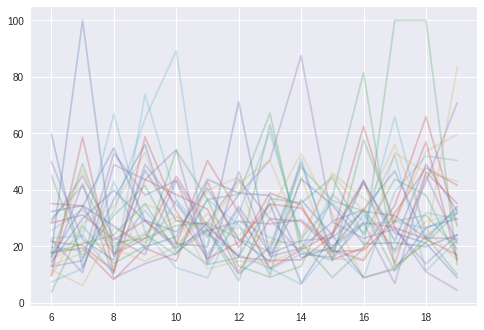

In [135]:
means.plot(legend=False, alpha=0.3)

En prenant la proportion d'achat de br par heure, nous ne voyons pas de schéma particulier qui se dégage.

# Chercher nouvelle piste de reflexion

In [2]:
df = pd.read_csv('16-06-2020_1month.csv', index_col="timestamp_string", parse_dates=True)
df.index.names = ['Date']
df = df[['identifiant','achat']]
df.head()

,identifiant,achat
Date,,
2020-06-16 06:00:01,1,1
2020-06-16 06:00:02,2,0
2020-06-16 06:00:03,3,0
2020-06-16 06:00:03,4,0
2020-06-16 06:00:03,5,0


In [5]:
test = df['2020-06-16':'2020-06-16']

In [6]:
test

,identifiant,achat
Date,,
2020-06-16 06:00:01,1,1
2020-06-16 06:00:02,2,0
2020-06-16 06:00:03,3,0
2020-06-16 06:00:03,4,0
2020-06-16 06:00:03,5,0
...,...,...
2020-06-16 19:52:08,3412,0
2020-06-16 19:52:09,3413,0
2020-06-16 19:52:11,3414,1


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

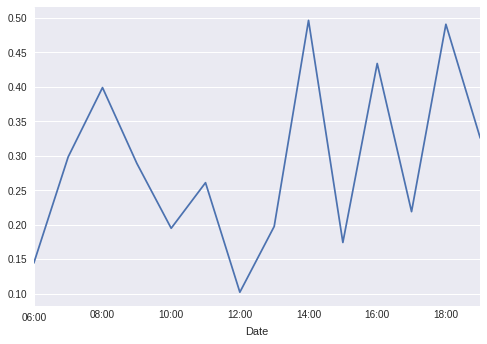

In [11]:
test['achat'].resample('H').mean().plot()

En réalité dans les simulations, je ne pense pas que le problème provient du fait qu'on ne reçoit pas assez de bid requests dans la fin de journée, mais il provient simplement du fait qu'on estime mal la dernière heure à laquelle on reçoit les br. 